In [1]:
# import packages
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# src configuration
src_hdf5_file_path = r"M:\2023-05-11\M347\FOV02\Group01\reportPlots_savehdf5\dffs_and_spike_mask.hdf5"

In [36]:
# show hdf5 file keys
with h5py.File(src_hdf5_file_path, "r") as hdf5_file:
    print(hdf5_file.keys())

<KeysViewHDF5 ['blank_end', 'blank_start', 'dffs', 'frame_rate_hz', 'rois', 'spike_masks', 'stim_end', 'stim_interval_ms', 'stim_start', 'trial_nums']>


In [37]:
# load data from hdf5 file
blank_start = None
blank_end = None
stim_start = None
stim_end = None
frame_rate_hz = None
stim_interval_ms = None

rois = None
dffs = None
spike_masks = None
trial_nums = None

with h5py.File(src_hdf5_file_path, "r") as hdf5_file:
    blank_start = hdf5_file["blank_start"][()]
    blank_end = hdf5_file["blank_end"][()]
    stim_start = hdf5_file["stim_start"][()]
    stim_end = hdf5_file["stim_end"][()]
    frame_rate_hz = hdf5_file["frame_rate_hz"][()]
    stim_interval_ms = hdf5_file["stim_interval_ms"][()]
    rois = hdf5_file["rois"][()]
    dffs = hdf5_file["dffs"][()]
    spike_masks = hdf5_file["spike_masks"][()]
    trial_nums = hdf5_file["trial_nums"][()]
    
print(rois.shape)
print(dffs.shape)
print(spike_masks.shape)

nof_rois, nof_trials, nof_frames = dffs.shape
nof_stims = len(stim_start)

(114,)
(114, 15, 3100)
(114, 15, 3100)


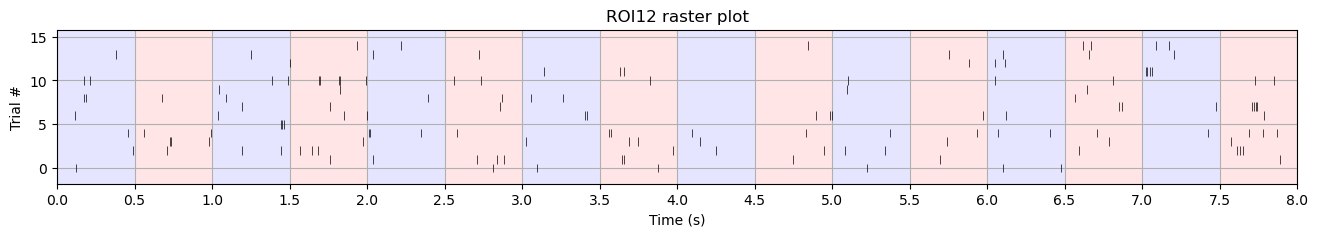

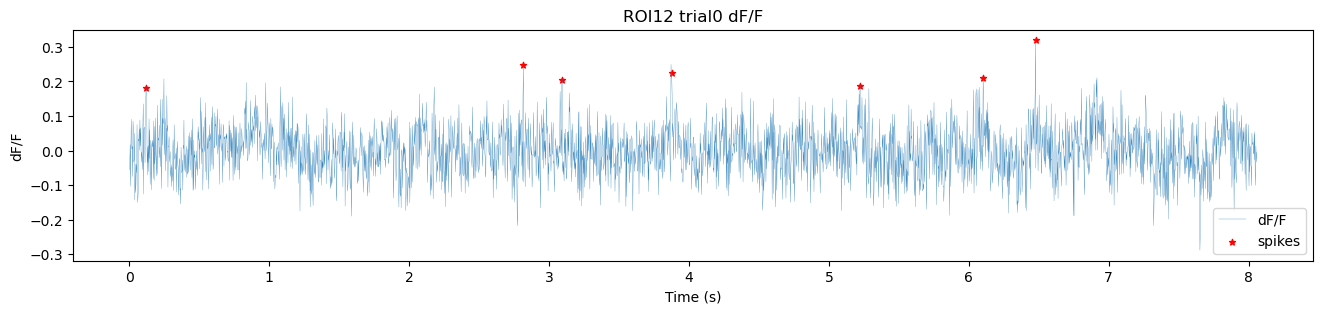

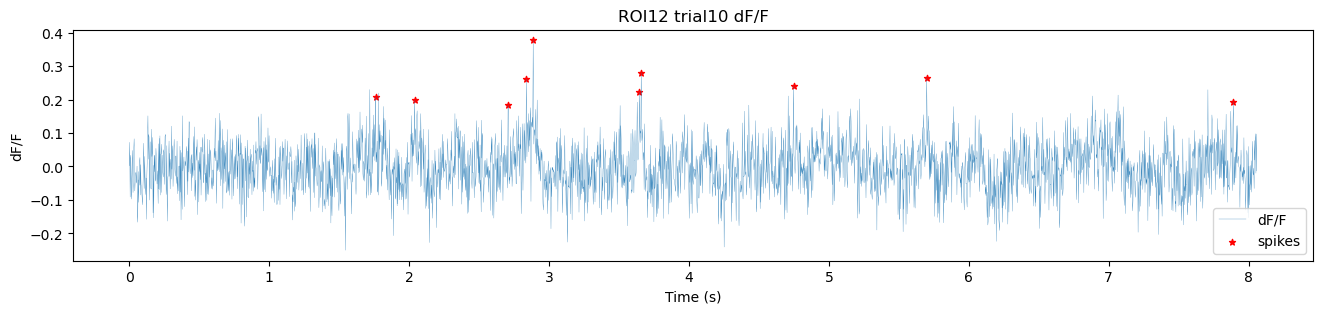

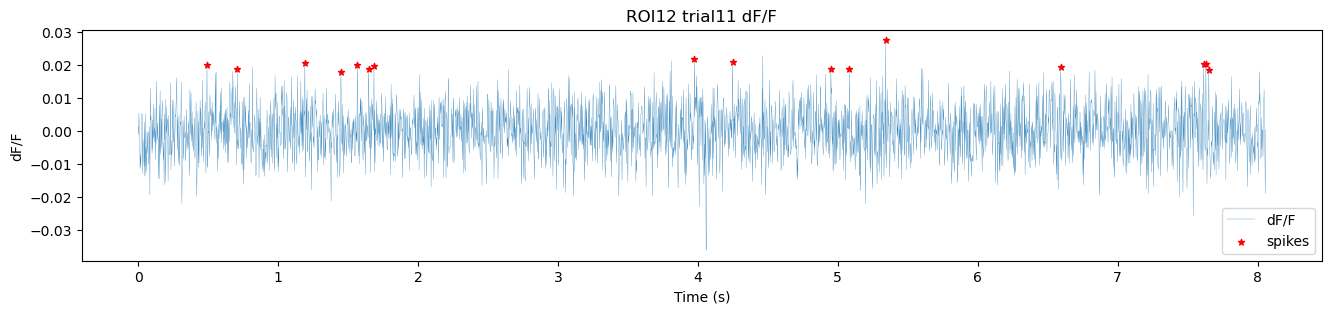

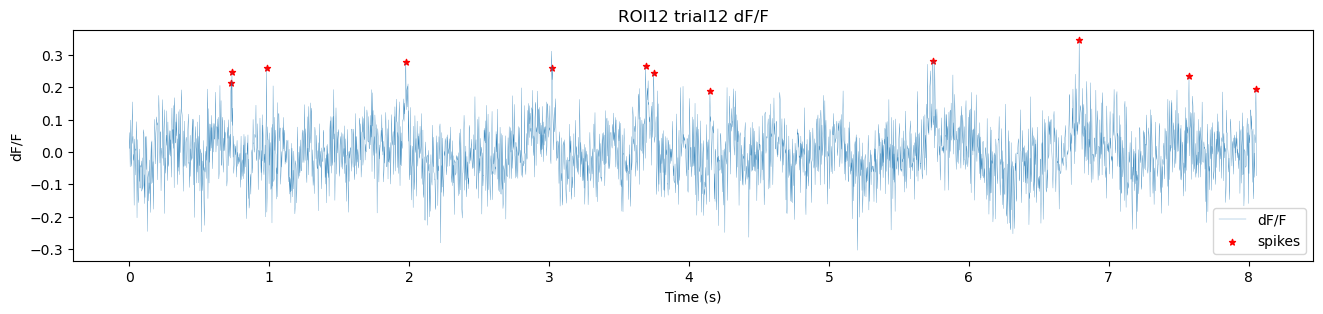

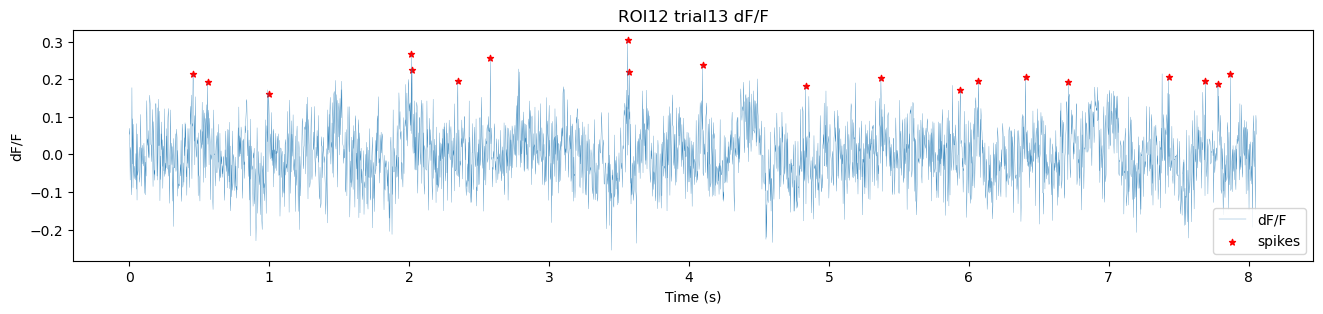

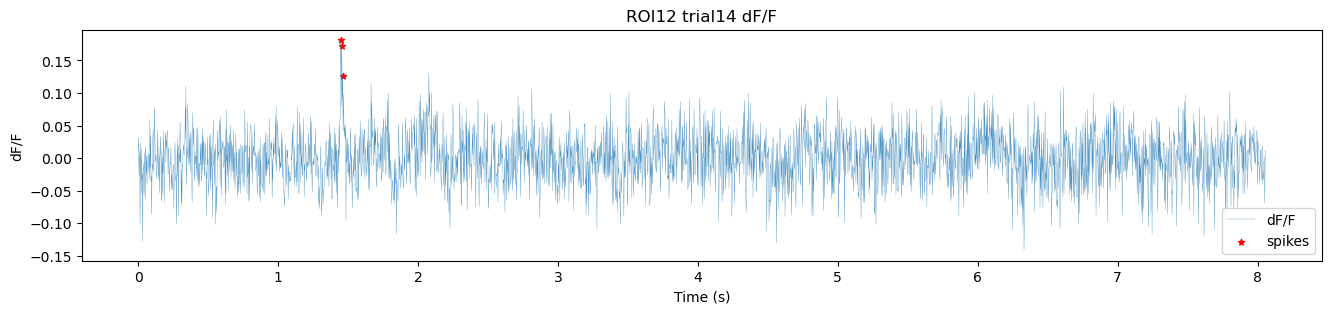

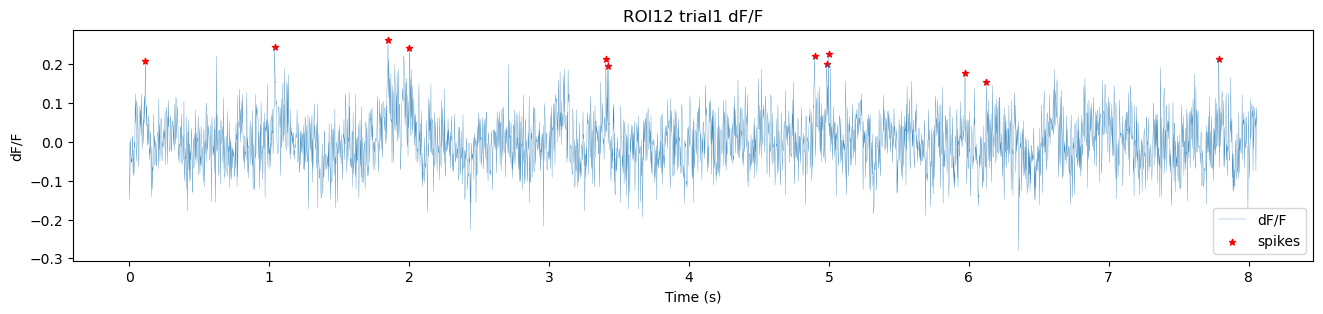

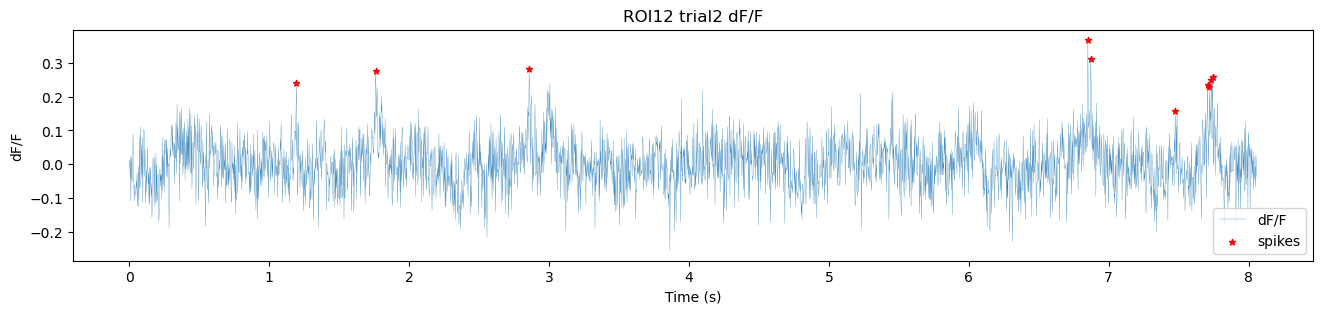

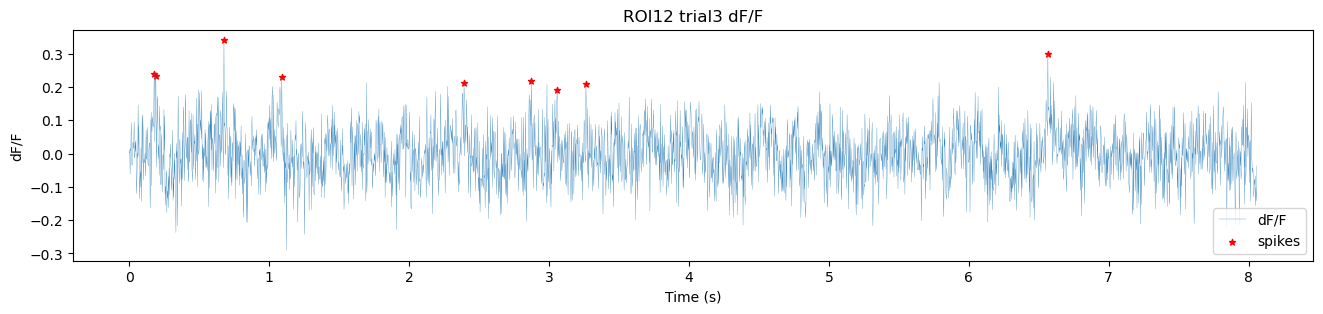

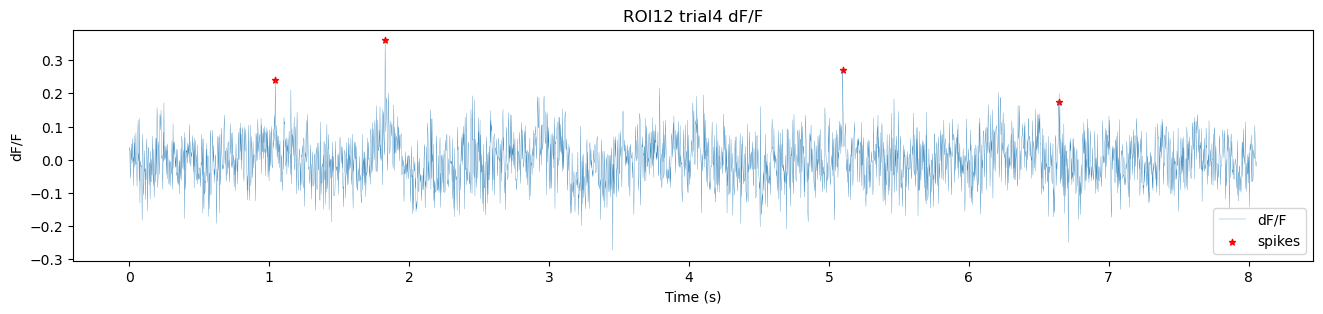

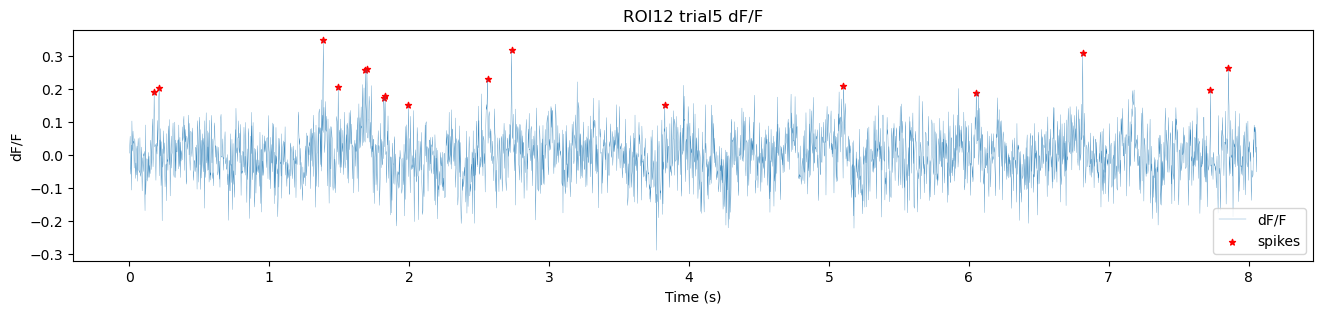

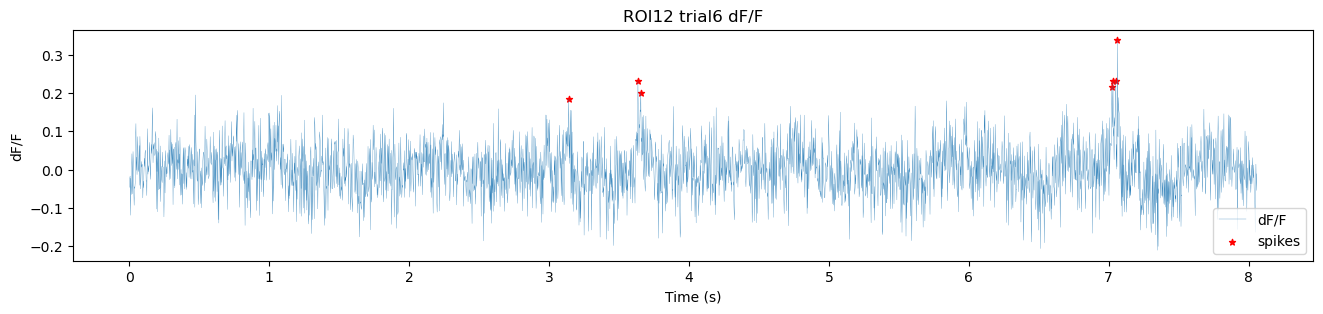

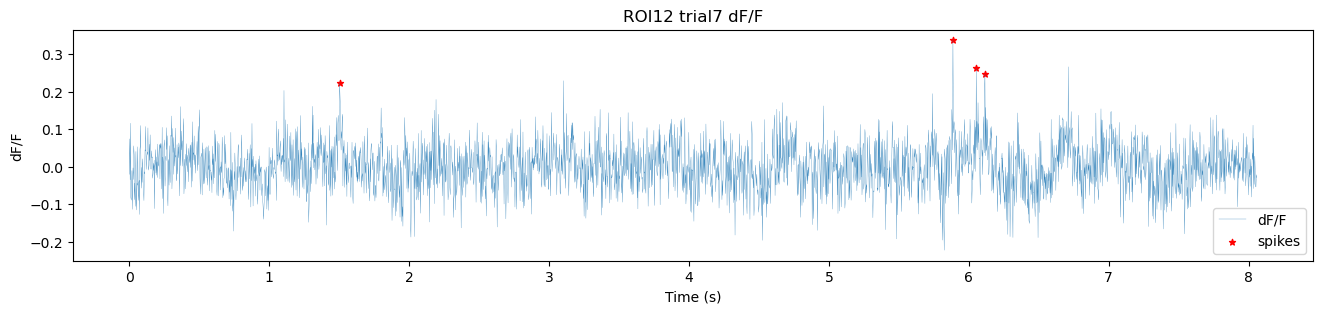

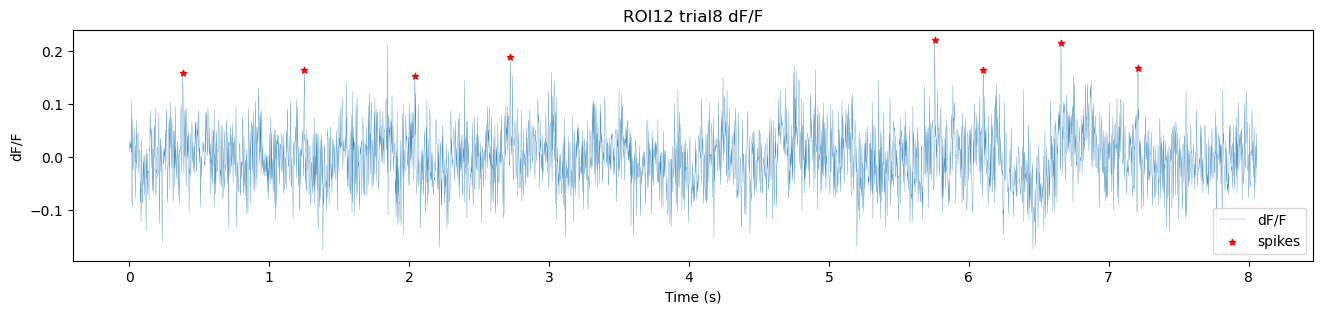

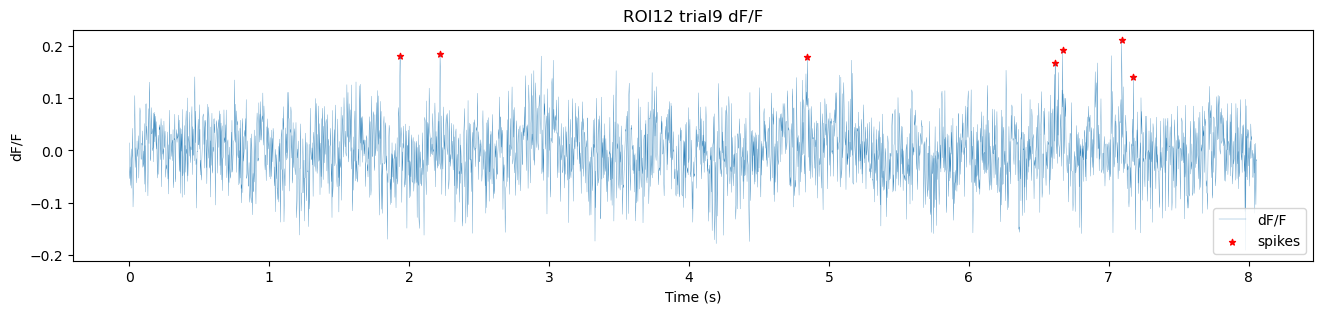

In [38]:
# plot raster plots and dF/F for one ROI

preview_idx = 12 # change this value to view different rois

# create event plot
i_roi = rois[preview_idx]
plt_xs = np.arange(nof_frames)
event_xs = [None for _ in range(nof_trials)]
for i_event in range(nof_trials):
    i_trial = trial_nums[i_event]
    event_xs[i_trial] = (plt_xs[spike_masks[preview_idx, i_event, :] > 0])

    
plt.figure(figsize = (16,2))
for i_stim in range(nof_stims):
    plt.axvspan(blank_start[i_stim], blank_end[i_stim], facecolor='b', alpha=0.1)
    plt.axvspan(stim_start[i_stim], stim_end[i_stim], facecolor='r', alpha=0.1)
plt.eventplot(event_xs, color = "k",
                lineoffsets = 1,
                linelengths = 1,
                linewidths = 0.5)
plt.grid(True)
plt.xlim(frame_rate_hz * stim_interval_ms * np.array([0, 2 * nof_stims]))
plt.xticks(frame_rate_hz * stim_interval_ms * np.arange(2 * nof_stims + 1), stim_interval_ms * np.arange(2 * nof_stims + 1))
plt.xlabel("Time (s)")
plt.ylabel("Trial #")
plt.title(f"ROI{i_roi} raster plot")

# plot dF/Fs 
ts_s = np.arange(nof_frames, dtype = float)/frame_rate_hz
for i_event in range(nof_trials):
    i_trial = trial_nums[i_event]
    dff = dffs[preview_idx, i_event, :]
    spike_mask = spike_masks[preview_idx, i_event, :] > 0
    plt.figure(figsize = (16,3))
    plt.plot(ts_s, dff, linewidth = 0.2, label = "dF/F")
    plt.scatter(ts_s[spike_mask], dff[spike_mask], s = 20, marker = "*", c = 'r', label = "spikes")
    plt.xlabel("Time (s)")
    plt.ylabel("dF/F")
    plt.legend(loc = "lower right")
    plt.title(f"ROI{i_roi} trial{i_trial} dF/F")